In [1]:
from pip._internal.main import main as pip_main

REQUIREMENTS = [
    "pandas"
]

pip_main(["install", "-q"] + REQUIREMENTS)

0

In [2]:
import random
import pandas as pd

pd.set_option("display.max_rows", None)

# Display Fetched List
def tabulate_resources(resources):
    if not isinstance(resources, (list, tuple)):
        resources = [resources]
        
    attrs = [attr for attr in dir(resources[0]) if not attr.startswith("__")]
    rows  = [ ]
        
    for resource in resources:
        row = [ ]
        
        for attr in attrs:
            value = getattr(resource, attr)
            row.append(value)
            
        rows.append(row)
        
    data   = pd.DataFrame(rows, columns = attrs)
    return data

### Usage

In [3]:
import cc

#### Create a Client Object

In [4]:
client = cc.Client()

#### Authentication

In [5]:
client.auth(email = "test@cellcollective.org", password = "test") # Authentication
client.authenticated                                              # Check if authenticated

2019-10-28 17:35:01,950 | INFO | Dispatching a POST Request to URL: https://cellcollective.org/_api/login with Arguments - {'data': {'username': 'test@cellcollective.org', 'password': 'test'}}
2019-10-28 17:35:02,074 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/getProfile with Arguments - {}


True

#### User Profile

In [6]:
client.profile

<User id=10887 name='Test Test'>

In [7]:
tabulate_resources(client.profile) # Display User Details

,email,first_name,id,institution,last_name,name
0,test@cellcollective.org,Test,10887,University of Nebraska-Lincoln,Test,Test Test


#### Get User Information by ID

In [8]:
user = client.get("user", id_ = 687)
tabulate_resources(user)

2019-10-28 17:35:03,518 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 687)]}


,email,first_name,id,institution,last_name,name
0,None,Tomas,687,None,Helikar,Tomas Helikar


#### Get Multiple Users' Information

In [9]:
nusers = 10
users  = client.get("user", id_ = [random.randint(1, 8000) for i in range(nusers)])
tabulate_resources(users)

2019-10-28 17:35:03,943 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 2308), ('id', 28), ('id', 727), ('id', 5626), ('id', 696), ('id', 3489), ('id', 38), ('id', 7123), ('id', 1452), ('id', 2246)]}


,email,first_name,id,institution,last_name,name
0,None,Erika,3489,None,Akers,Erika Akers
1,None,Garrett,7123,None,Grunder,Garrett Grunder
2,None,Rokey,2308,None,Danekas,Rokey Danekas
3,None,None,38,None,None,None
4,None,Marissa,2246,None,Campbell,Marissa Campbell
5,None,None,727,None,None,None
6,None,None,696,None,None,None
7,None,Michael,5626,None,Mattamira,Michael Mattamira
8,None,None,28,None,None,None
9,None,None,1452,None,None,None


#### Get Model Information

In [10]:
models = client.get("model")
tabulate_resources(models)

2019-10-28 17:35:04,349 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get with Arguments - {'params': None}
2019-10-28 17:35:06,366 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 686)]}
2019-10-28 17:35:06,442 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/2309 with Arguments - {'params': {'version': '1'}}
2019-10-28 17:35:06,583 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 70)]}
2019-10-28 17:35:06,644 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/5128 with Arguments - {'params': {'version': '1'}}
2019-10-28 17:35:06,712 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 687)]}
2019-10-28 17:35:06,768 | INFO | Dispatching a GET Request to

,author,created,description,domain,hash,id,name,ncitations,permissions,public,tags,updated,user,versions
0,R Samaga et. al.,2013-12-20 00:12:48,The epidermal growth factor receptor (EGFR) si...,research,None,2309,EGFR & ErbB Signaling,145.0,"{'view': True, 'edit': False, 'delete': False,...",True,"[Epidermal growth factor, Mammalian, Rac, Cdc4...","{'biologic': 2018-04-15 14:15:58, 'knowledge':...",<User id=686 name='Tomas Helikar'>,[<BooleanModel>]
1,Veliz-Cuba A and Stingler B.,2016-11-08 16:38:26,Our model includes the two main glucose contro...,research,None,5128,Lac Operon,NaN,"{'view': True, 'edit': False, 'delete': False,...",True,"[bistability, lac operon, E. coli]","{'biologic': 2016-12-19 21:58:31, 'knowledge':...",<User id=70 name='Audrey Crowther'>,[<BooleanModel>]
2,Audrey Crowther,2017-10-13 18:22:29,None,learning,None,10248,Bacteriophages in Cheese Production - Single V...,NaN,"{'view': True, 'edit': False, 'delete': False,...",True,None,"{'biologic': 2018-11-15 02:20:09, 'knowledge':...",<User id=687 name='Tomas Helikar'>,[<BooleanModel>]
3,Ryll A et. al.,2014-01-11 06:01:02,The pro-inflammatory cytokines interleukin 1 (...,research,None,2314,IL-6 Signalling,17.0,"{'view': True, 'edit': False, 'delete': False,...",True,"[IL-6, Interleukin, Inflammatory response]","{'biologic': 2017-05-18 18:46:50, 'knowledge':...",<User id=686 name='Tomas Helikar'>,[<BooleanModel>]
4,None,2018-09-04 15:50:18,None,learning,None,16659,Modeling Light Reactions and Dark Reactions in...,NaN,"{'view': True, 'edit': False, 'delete': False,...",True,None,"{'biologic': 2018-10-18 20:09:36, 'knowledge':...",<User id=767 name='Resa Helikar'>,"[<BooleanModel>, <BooleanModel>, <BooleanModel>]"


In [11]:
# Paginate through Resources
models = client.get("model", since = 10)
tabulate_resources(models)

2019-10-28 17:35:07,237 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get with Arguments - {'params': None}
2019-10-28 17:35:09,208 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 70)]}
2019-10-28 17:35:09,289 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/8227 with Arguments - {'params': {'version': '1'}}
2019-10-28 17:35:09,369 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 686)]}
2019-10-28 17:35:09,451 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/2084 with Arguments - {'params': {'version': '1'}}
2019-10-28 17:35:09,521 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 686)]}
2019-10-28 17:35:09,601 | INFO | Dispatching a GET Request to

,author,created,description,domain,hash,id,name,ncitations,permissions,public,tags,updated,user,versions
0,A Saddatpour et. al.,2017-07-20 16:02:32,The blood cancer T cell large granular lymphoc...,research,None,8227,T-LGL Survival Network 2011 Reduced Network,NaN,"{'view': True, 'edit': False, 'delete': False,...",True,"[T-LGL leukemia, SMAD, discrete dynamic model,...","{'biologic': 2017-07-20 21:59:45, 'knowledge':...",<User id=70 name='Audrey Crowther'>,[<BooleanModel>]
1,L Calzone et. al.,2013-04-15 15:28:57,Cytokines such as TNF and FASL can trigger dea...,research,None,2084,Death Receptor Signaling,105.0,"{'view': True, 'edit': False, 'delete': False,...",True,"[death receptor, cell fate]","{'biologic': 2016-01-22 13:08:46, 'knowledge':...",<User id=686 name='Tomas Helikar'>,[<BooleanModel>]
2,M Marques-Pita & LM Rocha,2014-02-17 19:34:20,"Drosophila melanogaster, body segmentation",research,None,2341,Body Segmentation in Drosophila 2013,6.0,"{'view': True, 'edit': False, 'delete': False,...",True,,"{'biologic': 2017-07-19 17:29:55, 'knowledge':...",<User id=686 name='Tomas Helikar'>,[<BooleanModel>]
3,None,2019-02-14 15:24:56,This is a model of a cell and then (if that ce...,learning,None,36647,Cell Cycle Regulation - Investigation 1,NaN,"{'view': True, 'edit': False, 'delete': False,...",True,None,"{'biologic': 2019-02-18 18:37:31, 'knowledge':...",<User id=767 name='Resa Helikar'>,[<BooleanModel>]
4,None,2019-02-14 17:51:42,This is a model of a cell and then (if that ce...,learning,None,36652,Cell Cycle Tumorigenesis - Investigation 2,NaN,"{'view': True, 'edit': False, 'delete': False,...",True,None,"{'biologic': 2019-02-18 19:46:20, 'knowledge':...",<User id=767 name='Resa Helikar'>,"[<BooleanModel>, <BooleanModel>, <BooleanModel..."


In [12]:
# Fetch Resources
model = client.get("model", id_ = 36652) # Fetches Model, ModelVersions (Components and Species).

2019-10-28 17:35:10,254 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/36652 with Arguments - {'params': None}


In [13]:
tabulate_resources(model.species)

,created,id,information,name,regulators,type,updated
0,2019-02-14 17:51:42,958408,{'description': 'UV radiation'},UV radiation,[],external,2019-02-14 17:51:42
1,2019-02-14 17:51:42,958409,{'description': 'This node represents double-s...,DNA Double-stand breaks,[<Regulator id=1412710 type='positive'>],internal,2019-02-14 17:51:42
2,2019-02-14 17:51:42,958406,{'description': 'This node represents cellular...,Detectable M damage,[<Regulator id=1412700 type='positive'>],internal,2019-02-14 17:51:42
3,2019-02-14 17:51:42,958407,{'description': 'This node represents mutation...,DNA mutations,[<Regulator id=1412707 type='positive'>],internal,2019-02-14 17:51:42
4,2019-02-14 17:51:42,958404,"{'upstream_regulator': '*In this model, the cy...",cyclinM,"[<Regulator id=1412702 type='negative'>, <Regu...",internal,2019-02-14 17:51:42
5,2019-02-14 17:51:42,958405,{'description': 'This node represents cellular...,Deteable G2 damage,[<Regulator id=1412701 type='positive'>],internal,2019-02-14 17:51:42
6,2019-02-14 17:51:42,958402,{'description': 'presence of a loss-of-functio...,mutation_restriction point_checkpoint LOF,[],external,2019-02-14 17:51:42
7,2019-02-14 17:51:42,958403,{'upstream_regulator': 'The cyclin that facili...,cyclinG1:cdkG1,[<Regulator id=1412689 type='positive'>],internal,2019-02-14 17:51:42
8,2019-02-14 17:51:42,958400,{'upstream_regulator': 'The cyclin:CDK complex...,cyclinS,"[<Regulator id=1412692 type='negative'>, <Regu...",internal,2019-02-14 17:51:42
9,2019-02-14 17:51:42,958401,{'upstream_regulator': 'The cyclin:CDK complex...,cyclinG1,"[<Regulator id=1412706 type='negative'>, <Regu...",internal,2019-02-14 17:51:42


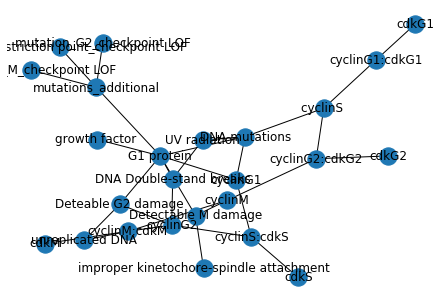

In [20]:
model.draw(labels = True)

In [21]:
model = client.read("sample.sbml")

2019-10-28 17:37:11,338 | INFO | Dispatching a POST Request to URL: https://cellcollective.org/_api/model/import with Arguments - {'files': {'upload': ('sample.sbml', <_io.BufferedReader name='sample.sbml'>)}}


In [22]:
tabulate_resources(model.species)

,created,id,information,name,regulators,type,updated
0,None,-1026,{},MMP3,[<Regulator id=-1773 type='positive'>],internal,None
1,None,-1028,{},MMP1,[<Regulator id=-1772 type='positive'>],internal,None
2,None,-1030,{},MMP1,[<Regulator id=-1649 type='positive'>],internal,None
3,None,-1032,{},IL6,[],external,None
4,None,-1034,{},JAK2_phosphorylated,"[<Regulator id=-1684 type='positive'>, <Regula...",internal,None
5,None,-1036,{},TNFSF11_rna,[<Regulator id=-1494 type='positive'>],internal,None
6,None,-1038,{},Osteoclastogenesis_phenotype,"[<Regulator id=-1482 type='positive'>, <Regula...",internal,None
7,None,-1040,{},Bone Erosion_phenotype,[<Regulator id=-1476 type='positive'>],internal,None
8,None,-1042,{},STAT3_phosphorylated,"[<Regulator id=-1507 type='positive'>, <Regula...",internal,None
9,None,-1044,{},STAT3_phosphorylated,[<Regulator id=-1504 type='positive'>],internal,None


In [23]:
model = client.get("model", id_ = 2171)

2019-10-28 17:37:35,531 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/2171 with Arguments - {'params': None}


In [24]:
model.score

92.8552

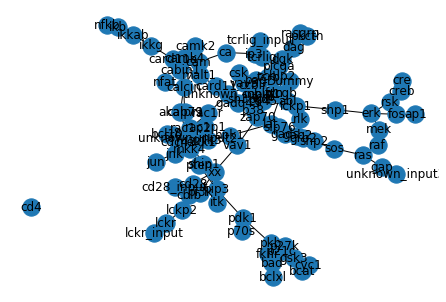

In [27]:
model.draw()

In [26]:
models = client.search("model", "T Cell")
tabulate_resources(models)

2019-10-28 17:37:43,424 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get with Arguments - {'params': [('search', 'species'), ('search', 'knowledge'), ('name', 'T Cell')]}
2019-10-28 17:37:48,999 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 686)]}
2019-10-28 17:37:49,084 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/2176 with Arguments - {'params': {'version': '1'}}
2019-10-28 17:37:49,217 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 686)]}
2019-10-28 17:37:49,293 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/3521 with Arguments - {'params': {'version': '1'}}
2019-10-28 17:37:49,585 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 686

,author,created,description,domain,hash,id,name,ncitations,permissions,public,tags,updated,user,versions
0,R Zhang et. al.,2013-06-26 16:38:44,T cell large granular lymphocyte (T-LGL) leuke...,research,None,2176,T-LGL Survival Network 2008,176.0,"{'view': True, 'edit': False, 'delete': False,...",True,"[T-LGL, T cell large granular lymphocyte, Cyto...","{'biologic': 2017-05-15 21:34:31, 'knowledge':...",<User id=686 name='Tomas Helikar'>,[<BooleanModel>]
1,BD Conroy et. al.,2013-12-06 02:19:58,Caveolin-1 (CAV1) is a vital scaffold protein ...,research,None,3521,CD4 T cell signaling,1.0,"{'view': True, 'edit': False, 'delete': False,...",True,,"{'biologic': 2016-01-22 13:08:46, 'knowledge':...",<User id=686 name='Tomas Helikar'>,[<BooleanModel>]
2,S Klamt et. al.,2015-02-09 18:00:08,Background Structural analysis of cellular int...,research,None,2691,T-Cell Signaling 2006,306.0,"{'view': True, 'edit': False, 'delete': False,...",True,"[T-lymphocyte, T Cell Signaling, receptor,]","{'biologic': 2016-01-22 13:08:46, 'knowledge':...",<User id=686 name='Tomas Helikar'>,[<BooleanModel>]
3,Ryll A et. al.,2014-01-11 06:01:02,The pro-inflammatory cytokines interleukin 1 (...,research,None,2314,IL-6 Signalling,17.0,"{'view': True, 'edit': False, 'delete': False,...",True,"[IL-6, Interleukin, Inflammatory response]","{'biologic': 2017-05-18 18:46:50, 'knowledge':...",<User id=686 name='Tomas Helikar'>,[<BooleanModel>]
4,Audrey Crowther,2017-12-14 17:48:21,This module will explore how the G2 checkpoint...,learning,None,11916,G2 Checkpoint Regulation and the FA/Breast Can...,NaN,"{'view': True, 'edit': False, 'delete': False,...",True,None,"{'biologic': 2018-05-07 03:57:35, 'knowledge':...",<User id=5780 name='Cell Collective Admin'>,[<BooleanModel>]
